In [ ]:
"""
Assignment: 2
Task : Minimum Error Rate Classifier
ID: 190104140 
Section: C2

"""

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
files.upload()

In [ ]:
#Reading data from the given text file and defining Mean and Co-variance matrices

data = pd.read_csv('test-Minimum-Error-Rate-Classifier.txt', sep = ',', header = None)
print(data)

data = np.array(data)
n = len(data)

mean1 = np.array([0, 0])
mean2 = np.array([2, 2])

cov1 = np.array([0.25, 0.3, 0.3, 1.0]).reshape((2,2))
cov2 = np.array([0.5, 0.0, 0.0, 0.5]).reshape((2,2))

prior = np.array([0.5, 0.5])

   0    1
0  1  1.0
1  1 -1.0
2  4  5.0
3 -2  2.5
4  0  2.0
5  2 -3.0


In [ ]:
# Defining function to calculaate Likelihood Probability of a datapoint using the multivariate normal distribution function

def calc_likelihood(datapoint, mean_mat, cov_mat):
    D = datapoint.shape[0]
    deviation = datapoint - mean_mat
    return np.exp(- 0.5 * np.dot(deviation, np.dot(np.linalg.inv(cov_mat), deviation.T))) / ((((2 * np.pi) ** D) * np.linalg.det(cov_mat)) ** 0.5)


In [ ]:
# Calculating Posterior Probability using Likelihood Probability of each datapoint
p1 = []
p2 = []

for i in range(n):
  p1.append(calc_likelihood(data[i, :], mean1, cov1) * prior[0])
  p2.append(calc_likelihood(data[i, :], mean2, cov2) * prior[1])

p1 = np.array(g1)
p2 = np.array(g2)

print('Posterior Porbability for Class 1: ', p1)
print('Posterior Porbability for Class 1: ', p2)

Posterior Porbability for Class 1:  [2.60957317e-02 6.13712786e-04 2.44194018e-15 4.76386919e-13
 8.74097521e-03 8.52320872e-15]
Posterior Porbability for Class 1:  [2.15392793e-02 7.22562324e-06 3.59742598e-07 1.39487343e-08
 2.91502447e-03 2.21033492e-12]


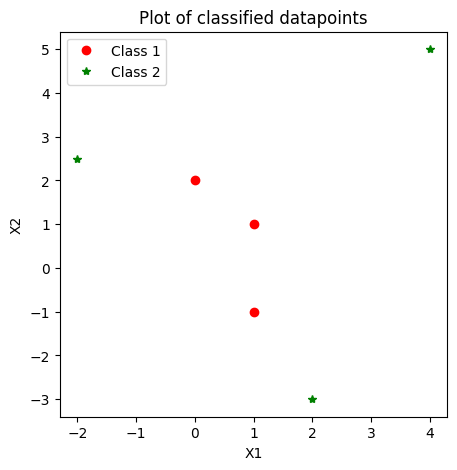

In [ ]:
# Classifying the given datapoints using the likelihood probability

class1 = data[p1>p2]
class2 = data[p1<=p2]

plt.figure(figsize=(5,5))

plt.plot(class1[:,0], class1[:,1], 'ro', label= 'Class 1')
plt.plot(class2[:,0], class2[:,1], 'g*', label= 'Class 2')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Plot of classified datapoints")
plt.legend()
plt.show()

In [ ]:
# Preparing data for contour of normal distribution

x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

Z1 = np.zeros((1000, 1000))
Z2 = np.zeros((1000, 1000))

for i in range(len(x)):
  for j in range(len(y)):
    p1 = calc_likelihood(np.array([x[i], y[j]]), mean1, cov1) * prior[0]
    p2 = calc_likelihood(np.array([x[i], y[j]]), mean2, cov2) * prior[0]

    Z1[i][j] = p1
    Z2[i][j] = p2


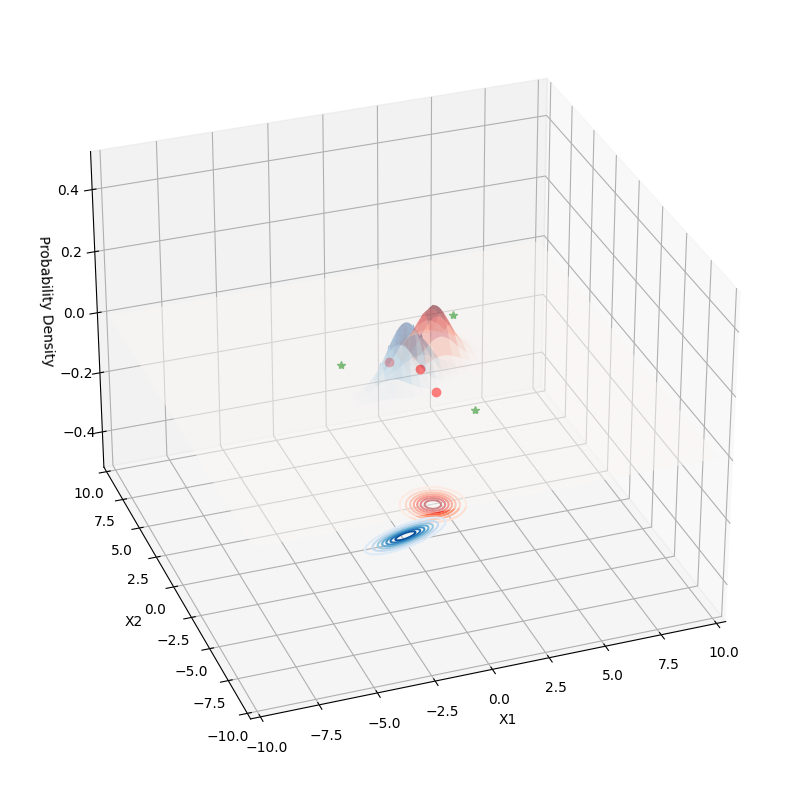

In [ ]:
# Drawing the surface and the contour with the datapoints

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z1,cmap='Blues',linewidth=0,alpha=0.3)
ax.plot_surface(X, Y, Z2,cmap='Reds',linewidth=0,alpha=0.3)


ax.plot(class1[:,0], class1[:,1], 'ro', label= 'Class 1')
ax.plot(class2[:,0], class2[:,1], 'g*', label= 'Class 2')

ax.contour(X, Y, Z1, zdir= 'z', offset= -0.5, cmap= 'Blues')
ax.contour(X, Y, Z2, zdir= 'z', offset= -0.5, cmap= 'Reds')

ax.set_zlim(-0.5, 0.5)
ax.set_xlim(10, -10)
ax.set_ylim(10, -10)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability Density')
ax.view_init(30, 70)

plt.show()
plt.show()